In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
data = pd.read_csv('sara_preprocess.csv')

/Users/sjk252/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fraud = pd.read_csv('Train_fraud.csv')

In [5]:
fraud['PotentialFraud'] = [1 if x == 'Yes' else 0 for x in fraud['PotentialFraud']]

In [6]:
df = pd.merge(data, fraud, how="outer", on="Provider")

In [26]:
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,1,1068.0,2009-04-18,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,None,None,None,1.0,0.0,0.0,9.0,1943-01-01,0,0,1,0.0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaN,0,0.0,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,None,None,None,None,None,None,None,0.0,0.0,0.0,9.0,1932-05-01,0,0,1,0.0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,1,1068.0,2009-02-01,4240,2639,2948,40390,45821,28489,5854,2753,E9305,None,7769.0,5849.0,None,None,None,None,1.0,1.0,2.0,9.0,1913-12-01,0,1,1,0.0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,1,1068.0,2009-11-04,V5789,4168,73313,7812,7993,78830,72273,43812,4019,None,9338.0,None,None,None,None,None,1.0,1.0,1.0,9.0,1922-10-01,0,0,1,0.0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,1,1068.0,2009-10-29,71535,71960,4019,V1202,4240,2449,2768,None,None,None,8154.0,None,None,None,None,None,1.0,1.0,1.0,7.0,1930-07-01,0,1,1,0.0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,1


In [7]:
df_fraud = df.groupby('PotentialFraud').mean()

In [8]:
df_fraud

,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,755.213352,0.242751,55.429929,0.049425,0.028331,0.036133,2.884988,0.007490,0.579017,1.241223,0.194427,25.946276,376.183579,11.927965,11.937562,0.399462,0.586937,0.405706,0.150332,0.308536,0.434625,0.703484,0.756533,0.317216,0.309355,0.099547,4903.940535,534.962431,2271.897486,647.402655
1,1389.505066,0.291589,119.921498,0.109974,0.063554,0.081839,3.215277,0.007256,0.578549,1.277392,0.200615,24.636483,382.491419,11.937165,11.940732,0.405774,0.596092,0.422221,0.153095,0.320062,0.435102,0.708495,0.763699,0.318347,0.314118,0.105246,5753.945375,623.612559,2288.496870,653.425807


In [9]:
data2 = pd.read_csv('final_features.csv')

In [90]:
df2 = pd.merge(data2, fraud, how="outer", on="Provider")

In [62]:
boxplot_data = df2[['InscClaimAmtReimbursed', 'DeductibleAmtPaid','PotentialFraud']]

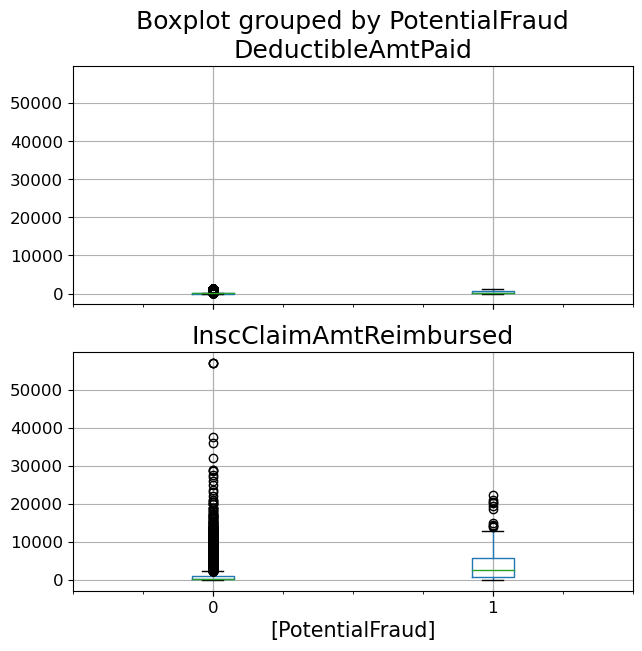

In [73]:
plt.rcParams.update({'font.size': 15})
boxplot = boxplot_data.boxplot(by='PotentialFraud', layout=(2, 1), fontsize=12, figsize = (7,7))

In [91]:
df2['PotentialFraud'] = ['Potential Fraud' if x == 1 else "Not Fraud" for x in df2.PotentialFraud]

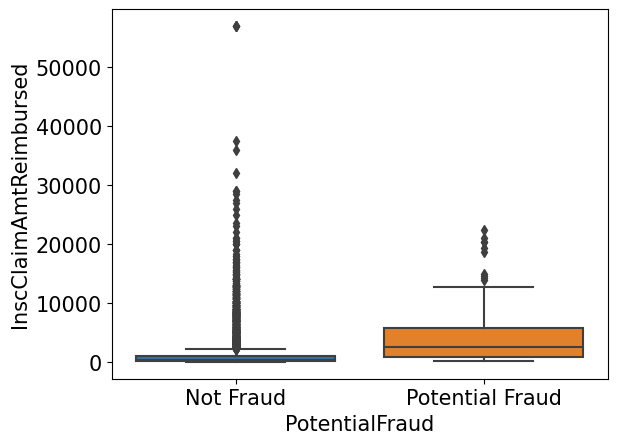

In [92]:
ax = sns.boxplot(x="PotentialFraud", y="InscClaimAmtReimbursed", data=df2)

In [27]:
df2.head()

,Provider,ClaimID,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diag,V5861_diag,2724_diag,4011_diag,2449_diag,4019_diag,25000_diag,42731_diag,4019_proc,9904_proc,2724_proc,8154_proc,66_proc,3893_proc,3995_proc,4516_proc,3722_proc,8151_proc,8872_proc,5_state,10_state,33_state,45_state,14_state,39_state,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_days,PotentialFraud
0,PRV51001,25,11,5.0,2,3,80.0,8.0,12,1,0,2,0,1,3,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,14.0,4185.600000,213.600000,1.000000,0.640000,17606.000000,12.000000,12.000000,897.120000,2615.200000,463.920000,5.560000,77.880000,1.440000,0
1,PRV51003,132,78,62.0,39,48,693.0,29.0,29,7,6,16,3,12,25,15,11,3,0,1,2,1,2,2,1,2,0,0,0,23,0,0,0,0,117.0,44.0,4588.409091,502.166667,2.424242,0.590909,7568.181818,11.818182,11.871212,931.424242,2678.181818,737.121212,4.545455,69.083333,3.674242,1
2,PRV51004,149,28,0.0,0,0,385.0,23.0,76,2,4,12,6,8,22,8,3,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,0,138.0,38.0,350.134228,2.080537,0.000000,0.691275,4351.879195,11.865772,11.959732,434.953020,2194.899329,622.751678,4.342282,71.261745,1.429530,0
3,PRV51005,1165,252,0.0,0,0,3016.0,259.0,565,56,47,73,62,30,140,54,23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,495.0,7.0,241.124464,3.175966,0.000000,0.561373,3623.991416,11.907296,11.939914,379.162232,2109.733906,636.328755,4.335622,69.526180,1.088412,1
4,PRV51007,72,17,3.0,1,1,215.0,11.0,31,2,7,5,3,6,10,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58.0,10.0,468.194444,45.333333,0.222222,0.527778,3050.000000,11.833333,11.833333,445.000000,1729.722222,469.722222,4.166667,68.305556,0.958333,0


In [11]:
df_fraud2 = df2.groupby('PotentialFraud').mean()

In [12]:
df_fraud2

,ClaimID,ClmAdmitDiagnosisCode,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,RenalDiseaseIndicator,duplicate,V5869_diag,V5861_diag,2724_diag,4011_diag,2449_diag,4019_diag,25000_diag,42731_diag,4019_proc,9904_proc,2724_proc,8154_proc,66_proc,3893_proc,3995_proc,4516_proc,3722_proc,8151_proc,8872_proc,5_state,10_state,33_state,45_state,14_state,39_state,Patient_Connections,AttPhys_Connections,InscClaimAmtReimbursed,DeductibleAmtPaid,treatment_days,Gender,IPAnnualReimbursementAmt,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,num_chronic,Age,claim_days
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.435359,17.098287,3.481240,1.995514,2.545065,203.205139,13.694535,31.648858,3.212276,2.512235,4.293842,3.080139,2.105220,9.382953,4.540579,2.331974,0.167210,0.105628,0.084217,0.082993,0.073817,0.075653,0.067700,0.057300,0.051998,0.037113,0.034054,4.285277,4.396615,3.575041,4.870922,3.243883,2.610726,49.110318,13.824633,1523.780804,136.489541,0.719873,0.581198,5868.975601,11.918712,11.930302,638.107001,2191.723203,628.840769,4.511368,72.750158,1.914981
1,420.545455,122.626482,46.249012,26.727273,34.416996,1352.169960,84.367589,177.920949,17.976285,14.986166,29.017787,17.079051,14.379447,61.318182,29.814229,17.166008,2.250988,1.252964,1.266798,1.215415,1.065217,0.954545,0.942688,0.731225,0.660079,0.555336,0.482213,59.950593,34.608696,34.569170,20.029644,16.816206,22.624506,242.021739,41.529644,3842.795104,353.593672,2.003209,0.577217,9052.076164,11.929448,11.933988,946.817676,2273.113210,631.565539,4.810170,72.796386,2.973527


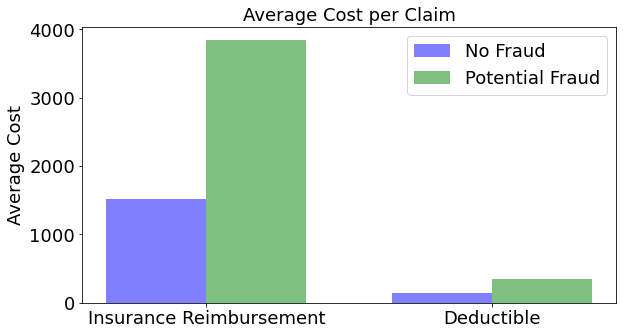

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

# data to plot
n_groups = 2
means_fraud = (1524, 136)
means_NoFraud = (3843, 354)

# create plot
fig, ax = plt.subplots(figsize = (9,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5

rects1 = plt.bar(index, means_fraud, bar_width,
alpha=opacity,
color='b',
label='No Fraud')

rects2 = plt.bar(index + bar_width, means_NoFraud, bar_width,
alpha=opacity,
color='g',
label='Potential Fraud')

#plt.xlabel('Person')
plt.ylabel('Average Cost', fontsize=18)

plt.title('Average Cost per Claim', fontsize=18)
plt.xticks(index + bar_width/2, ('Insurance Reimbursement', 'Deductible'), fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()

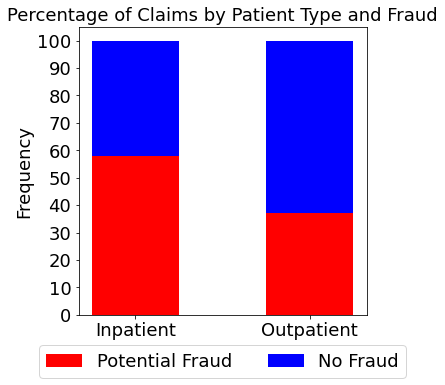

In [14]:
import numpy as np
import matplotlib.pyplot as plt
N = 2
FraudMeans = (58, 37)
NoFraudMeans = (42, 63)
ind = np.arange(N) # the x locations for the groups
width = 0.5
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, FraudMeans, width, color='r')
ax.bar(ind, NoFraudMeans, width,bottom=FraudMeans, color='b')
ax.set_ylabel('Frequency')
ax.set_title('Percentage of Claims by Patient Type and Fraud', fontsize=18)
plt.xticks(ind, ('Inpatient', 'Outpatient'))
#ax.set_xticks(ind + width, ('Inpatient', 'Outpatient'))
ax.set_yticks(np.arange(0, 110, 10))
ax.legend(labels=['Potential Fraud', 'No Fraud'], loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=2)
#plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)
#ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)
#leg = plt.legend( loc = 'upper right')

plt.draw() # Draw the figure so you can find the positon of the legend. 
# Get the bounding box of the original legend
#bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
#xOffset = 1.5
#bb.x0 += xOffset
#bb.x1 += xOffset
#leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.show()

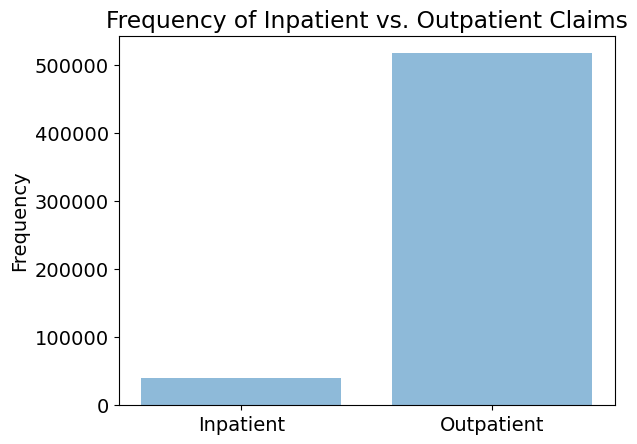

In [15]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

objects = ('Inpatient', 'Outpatient')
y_pos = np.arange(len(objects))
performance = [40474,517737]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Frequency of Inpatient vs. Outpatient Claims')

plt.show()

In [16]:
print(23402/(23402+17072))
print(189394/(189394+328343))

0.5781983495577407
0.36581121302900893


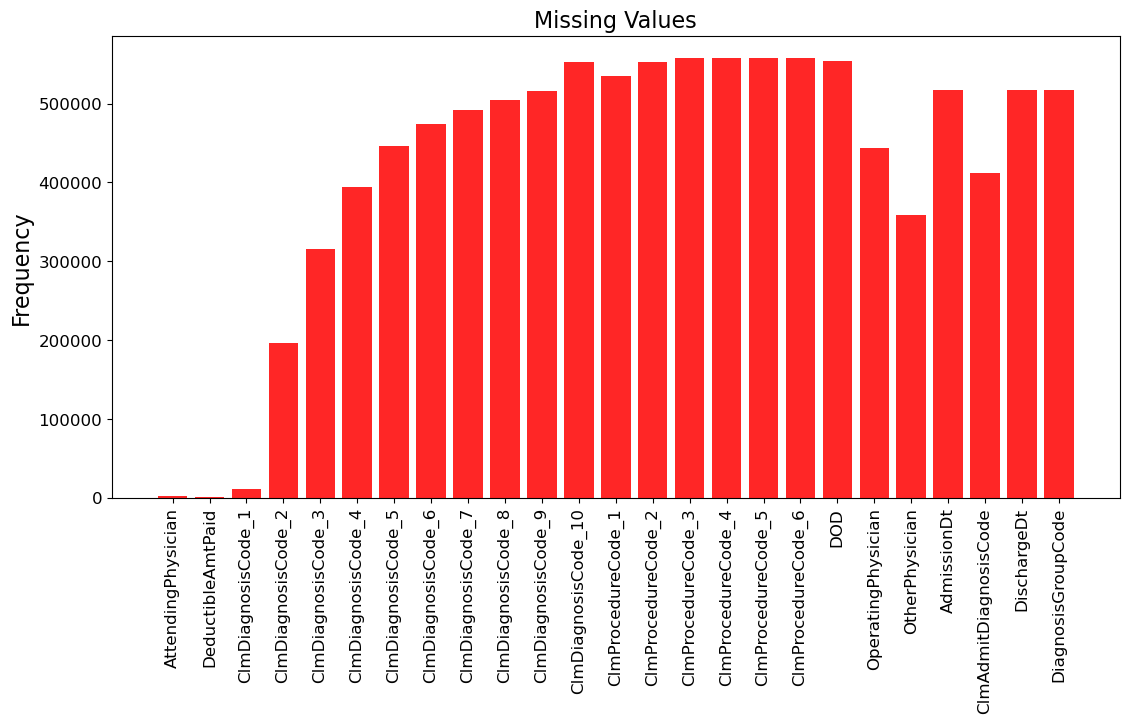

In [18]:
from matplotlib.pyplot import figure
features = ('AttendingPhysician','DeductibleAmtPaid','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
            'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8',
            'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3',
           'ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6','DOD','OperatingPhysician','OtherPhysician',
            'AdmissionDt','ClmAdmitDiagnosisCode','DischargeDt','DiagnosisGroupCode',)
y_pos = np.arange(len(features))
missingness = [1508,899,10453,195606,315156,393675,446287,473819,
               492034,504767,516396,553201,534901,552721,557242,558093,
               558202,558211,554080,443764,358475,517737,412312,517737,517737]

plt.figure(figsize=(13,6))

plt.bar(y_pos, missingness, align='center', alpha=0.85, color = 'red')
plt.xticks(y_pos, features, fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.ylabel('Frequency', fontsize=16)
plt.title('Missing Values', fontsize=16)

plt.show()

In [19]:
data3.head()

NameError: name 'data3' is not defined

In [21]:
ProvDupByFraud = df2.groupby(['Provider','PotentialFraud'])['duplicate'].sum().reset_index()
ProvDupByFraud

,Provider,PotentialFraud,duplicate
0,PRV51001,0,12
1,PRV51003,1,29
2,PRV51004,0,76
3,PRV51005,1,565
4,PRV51007,0,31
5,PRV51008,0,17
6,PRV51011,0,29
7,PRV51012,0,22
8,PRV51013,0,19
9,PRV51014,0,8


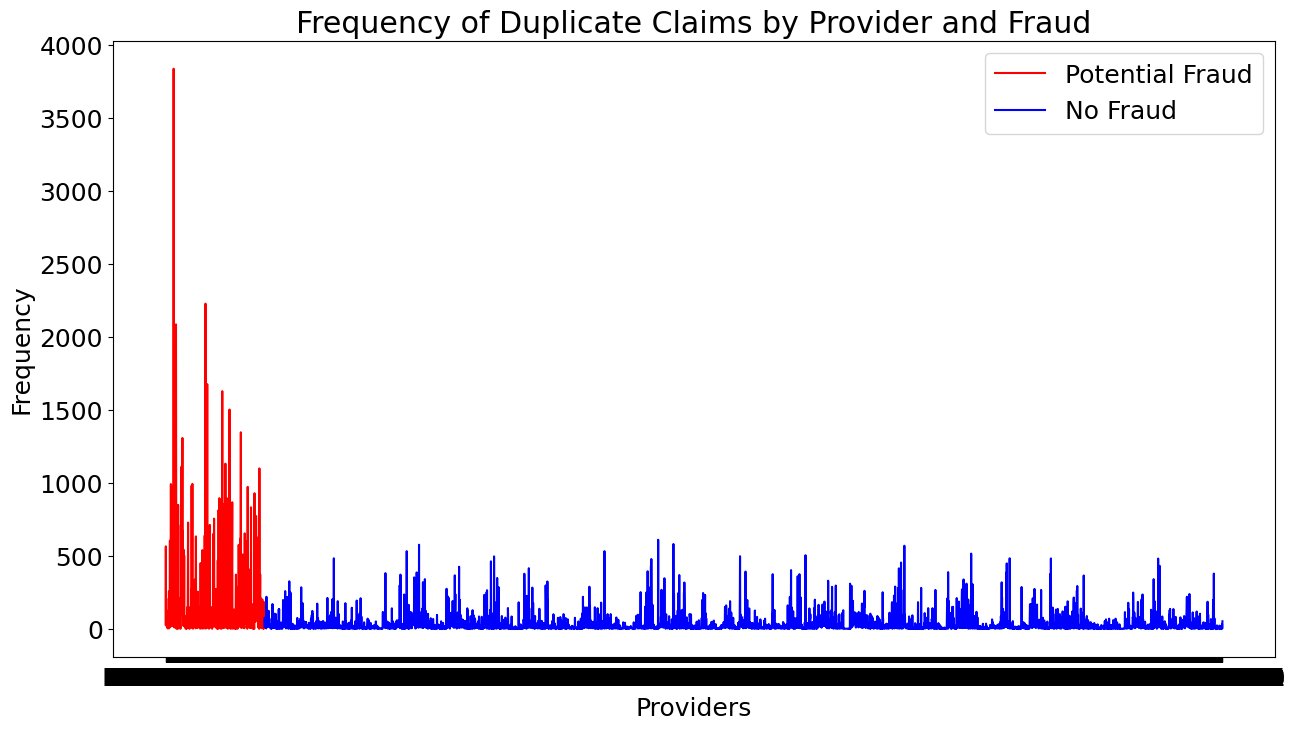

In [24]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(15,8))
plt.plot(ProvDupByFraud[ProvDupByFraud['PotentialFraud']==1].Provider, ProvDupByFraud[ProvDupByFraud['PotentialFraud']==1]['duplicate'], color="r", label='Potential Fraud')
plt.plot(ProvDupByFraud[ProvDupByFraud['PotentialFraud']==0].Provider, ProvDupByFraud[ProvDupByFraud['PotentialFraud']==0]['duplicate'], color="b", label='No Fraud')
plt.ylabel('Frequency')
plt.xlabel('Providers')
plt.title('Frequency of Duplicate Claims by Provider and Fraud')
plt.legend()
plt.show() #small group of potential fraud providers represent most of the duplicates

In [28]:
df.groupby('PotentialFraud')['State'].value_counts()

PotentialFraud  State
0               45       23887
                10       21561
                5        21015
                33       17532
                14       15908
                36       14910
                34       14520
                11       12880
                23       12805
                39       12803
                15        9578
                21        8685
                18        8643
                52        7839
                44        7709
                26        7610
                3         7314
                42        7311
                50        6958
                31        6828
                1         6715
                49        6384
                19        6230
                25        5863
                22        5826
                4         5626
                37        5210
                38        4748
                16        4724
                24        4273
                51        4178
                7

In [29]:
df.PotentialFraud.value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [185]:
print(21015/345415)
print(30335/212796)

0.06083985929968299
0.1425543713227692


In [30]:
df.groupby('PotentialFraud')['County'].value_counts()

PotentialFraud  County
0               10        10750
                60         8814
                20         8458
                90         7007
                0          6584
                200        5879
                150        5843
                141        5793
                400        5735
                160        5668
                310        5590
                70         5487
                50         5430
                250        5385
                40         5276
                470        5230
                480        5229
                490        5010
                100        4995
                120        4936
                240        4887
                550        4513
                30         4491
                390        4428
                290        4417
                80         4336
                610        4225
                270        4170
                460        4071
                410        3763
                3

In [31]:
df.groupby('PotentialFraud')['Race'].value_counts()

PotentialFraud  Race
0               1       292691
                2        35356
                3        10753
                5         6615
1               1       178345
                2        20284
                3         8962
                5         5205
Name: Race, dtype: int64

In [32]:
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Inpatient,ClmProcedureCode,ClmProcedureCode_count,ClmDiagnosisCode_count,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,1,1068.0,2009-04-18,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,None,None,None,1.0,0.0,0.0,9.0,1943-01-01,0,0,1,0.0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,None,NaN,0,0.0,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,None,None,None,None,None,None,None,0.0,0.0,0.0,9.0,1932-05-01,0,0,1,0.0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,1,1068.0,2009-02-01,4240,2639,2948,40390,45821,28489,5854,2753,E9305,None,7769.0,5849.0,None,None,None,None,1.0,1.0,2.0,9.0,1913-12-01,0,1,1,0.0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,None,2009-10-17,1,1068.0,2009-11-04,V5789,4168,73313,7812,7993,78830,72273,43812,4019,None,9338.0,None,None,None,None,None,1.0,1.0,1.0,9.0,1922-10-01,0,0,1,0.0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,1,1068.0,2009-10-29,71535,71960,4019,V1202,4240,2449,2768,None,None,None,8154.0,None,None,None,None,None,1.0,1.0,1.0,7.0,1930-07-01,0,1,1,0.0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,1


In [189]:
data.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
AdmissionDt                         object
ClmAdmitDiagnosisCode                int64
DeductibleAmtPaid                  float64
DischargeDt                         object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosisCode_10                 object
ClmProcedur

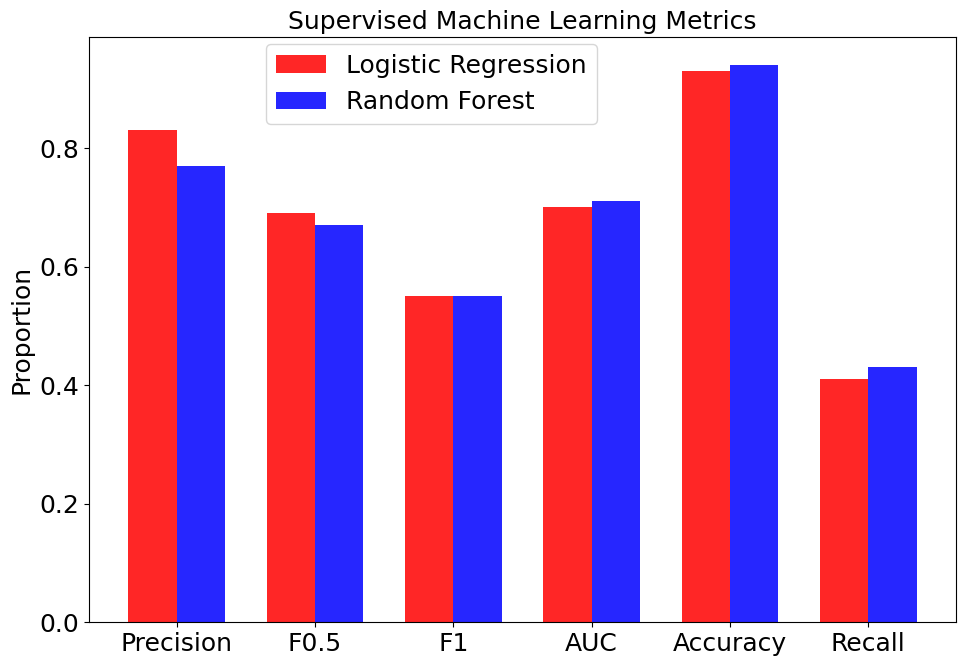

In [269]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

# data to plot
n_groups = 6
Logistic_Regression = (0.83, 0.69, 0.55, 0.70, 0.93, 0.41)
Random_Forest = (0.77, 0.67, 0.55, 0.71, 0.94, 0.43)
Gradient_Boosting = (0.71, 0.62, 0.52, 0.770, 0.93, 0.42)

ax = fig.add_axes([0,0,1,1])

# create plot
fig, ax = plt.subplots(figsize = (10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.85

rects1 = ax.bar(index, Logistic_Regression, bar_width,
alpha=opacity,
color='r',
label='Logistic Regression')

rects2 = ax.bar(index + bar_width, Random_Forest, bar_width,
alpha=opacity,
color='b',
label='Random Forest')

#plt.xlabel('Person')
plt.ylabel('Proportion', fontsize=18)

plt.title('Supervised Machine Learning Metrics', fontsize=18)
plt.xticks(index + bar_width/2, ('Precision', 'F0.5','F1','AUC','Accuracy','Recall'), fontsize=18)
plt.legend(loc="upper right", bbox_to_anchor=(0.6, 1.01))

#ax.legend(labels=['Potential Fraud', 'No Fraud'], loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.tight_layout()
plt.show()

In [215]:
#TP / (TP+FN)
64/(64+85)

0.42953020134228187

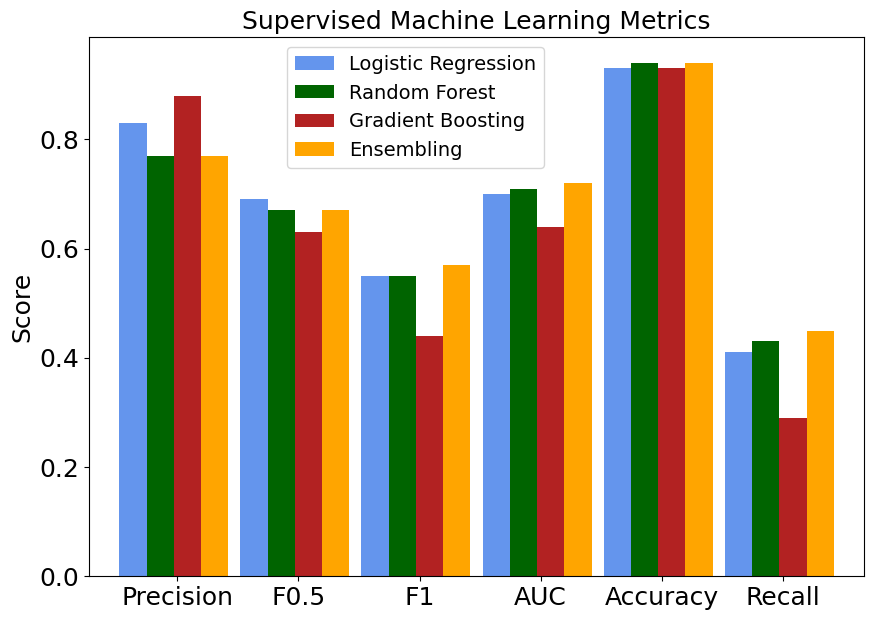

In [295]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

width = .9 # width of a bar

m1_t = pd.DataFrame({
 'Logistic Regression' : [0.83, 0.69, 0.55, 0.70, 0.93, 0.41],
 'Random Forest' : [0.77, 0.67, 0.55, 0.71, 0.94, 0.43],
 'Gradient Boosting' : [0.88, 0.63, 0.44, 0.64, 0.93, 0.29],
    'Ensembling' : [0.77, 0.67, 0.57, 0.72, 0.94, 0.45]})

m1_t[['Logistic Regression','Random Forest',
      'Gradient Boosting','Ensembling']].plot(kind='bar', 
                                 width = width, 
                                 color = ('cornflowerblue','darkgreen','firebrick','orange'),
                                 figsize = (10,7))

ax = plt.gca()

plt.ylabel('Score', fontsize=18)

plt.title('Supervised Machine Learning Metrics', fontsize=18)
plt.xticks(index + bar_width/12, ('Precision', 'F0.5','F1','AUC','Accuracy','Recall'), fontsize=18, rotation =0)
plt.legend(loc="upper right", bbox_to_anchor=(0.6, 1.0), fontsize=14)

plt.show()



In [35]:
gradient_boosting_FeatImp = {
 'Inpatient' : 0.32, 'ClmProcedureCode_count' : 0.175, '25000_diag' : 0.06, 'ClmProcedureCode' : 0.05, 
    '2724_diag' : 0.04, '42731_diag' : 0.035, 'ClmAdmitDiagnosisCode' : 0.03, 'ClaimID' : 0.025, 'Claim_days' : 0.023, 
    'OPAnnualReimbursementAmt' : 0.022, 'InsClaimAmtReimbursed' : 0.021, 'Patient_Connections' : 0.02, 
    'DeductibleAmtPaid' : 0.02, 'treatment_days' : 0.019, 'Gender' : 0.019, 'Age' : 0.018, '2449_diag' : 0.017,
    '4019_proc' : 0.016, 'RenalDiseaseindicator' : 0.015, 'duplicate' : 0.014, 'V5869_diag' : 0.013, 
    'NoOfmonths_PartACov' : 0.012, 'ClmDiagnosisCode_count' : 0.011, '45_state' : 0.01, 
    '14_state' : 0.0095, '39_state' : 0.009, 'OPAnnualDeductibleAmt' : 0.0085, '8151_proc' : 0.008,
    'NoOfmonths_PartBCov' : 0.0075, 'num_chronic' : 0.007, '2724_proc' : 0.0065, 'IPAnnualReimbursementAmt' : 0.006,
    'AttPhys_Connections' : 0.0055, '8154_proc' : 0.005, '4516_proc' : 0.0045, '66_proc' : 0.004, '3722_proc' : 0.0035,
    'IPAnnualDeductibleAmt' : 0.003, '3995_proc' : 0.0025, 'V5861_proc' : 0.002, '4019_diag' : 0.0015,
    '10_state' : 0.001, '9904_proc' : 0.001, '33_state' : 0.001, '4011_diag' : 0.001, '3893_proc' : 0.0005,
    '8872_proc' : 0.0005, '5_state' : 0.0005}


In [40]:
gradient_boosting_FeatImp = pd.DataFrame.from_dict(gradient_boosting_FeatImp, orient='index').reset_index()
gradient_boosting_FeatImp.columns = ['Feature','Importance_Score']

In [42]:
gradient_boosting_FeatImp.columns = ['Feature','Importance_Score']

In [43]:
gradient_boosting_FeatImp

,Feature,Importance_Score
0,Inpatient,0.3200
1,ClmProcedureCode_count,0.1750
2,25000_diag,0.0600
3,ClmProcedureCode,0.0500
4,2724_diag,0.0400
5,42731_diag,0.0350
6,ClmAdmitDiagnosisCode,0.0300
7,ClaimID,0.0250
8,Claim_days,0.0230
9,OPAnnualReimbursementAmt,0.0220


In [48]:
Random_forest_FeatImp = {
 'Inpatient' : 0.09, 'ClmProcedureCode_count' : 0.072, '25000_diag' : 0.031, 'ClmProcedureCode' : 0.057, 
    '2724_diag' : 0.031, '42731_diag' : 0.056, 'ClmAdmitDiagnosisCode' : 0.042, 'ClaimID' : 0.022, 'Claim_days' : 0.0218, 
    'OPAnnualReimbursementAmt' : 0.02, 'InsClaimAmtReimbursed' : 0.03, 'Patient_Connections' : 0.022, 
    'DeductibleAmtPaid' : 0.032, 'treatment_days' : 0.041, 'Gender' : 0.0185, 'Age' : 0.0215, '2449_diag' : 0.0395,
    '4019_proc' : 0.021, 'RenalDiseaseindicator' : 0.029, 'duplicate' : 0.023, 'V5869_diag' : 0.0095, 
    'NoOfmonths_PartACov' : 0.0092, 'ClmDiagnosisCode_count' : 0.031, '45_state' : 0.0023, 
    '14_state' : 0.0025, '39_state' : 0.0025, 'OPAnnualDeductibleAmt' : 0.018, '8151_proc' : 0.0021,
    'NoOfmonths_PartBCov' : 0.01, 'num_chronic' : 0.0207, '2724_proc' : 0.003, 'IPAnnualReimbursementAmt' : 0.028,
    'AttPhys_Connections' : 0.0175, '8154_proc' : 0.0022, '4516_proc' : 0.0018, '66_proc' : 0.0028, '3722_proc' : 0.0015,
    'IPAnnualDeductibleAmt' : 0.025, '3995_proc' : 0.0015, 'V5861_proc' : 0.011, '4019_diag' : 0.0018,
    '10_state' : 0.0028, '9904_proc' : 0.009, '33_state' : 0.0025, '4011_diag' : 0.012, '3893_proc' : 0.0018,
    '8872_proc' : 0.001, '5_state' : 0.003}


In [52]:
Random_forest_FeatImp = pd.DataFrame.from_dict(Random_forest_FeatImp, orient='index').reset_index()
Random_forest_FeatImp.columns = ['Feature','Importance_Score']

## Note: See Logistic_Regression_StateCodes for final feature comparison across models